# 线性回归的从零开始实现

我们将从零开始实现整个方法，
包括数据流水线、模型、损失函数和小批量随机梯度下降优化器

In [49]:
%matplotlib inline
import random
import torch
from d2l import torch as d2l

根据带有噪声的线性模型构造一个人造数据集。
我们使用线性模型参数$\mathbf{w} = [2, -3.4]^\top$、$b = 4.2$
和噪声项$\epsilon$生成数据集及其标签：

$$\mathbf{y}= \mathbf{X} \mathbf{w} + b + \mathbf\epsilon$$

In [50]:
def synthetic_data(w, b, num_examples):  
    """生成y=Xw+b+噪声"""
    X = torch.normal(0, 1, (num_examples, len(w)))
    y = torch.matmul(X, w) + b
    y += torch.normal(0, 0.01, y.shape)
    return X, y.reshape((-1, 1))

true_w = torch.tensor([2, -3.4])
true_b = 4.2
features, labels = synthetic_data(true_w, true_b, 1000)

`features`中的每一行都包含一个二维数据样本，
`labels`中的每一行都包含一维标签值（一个标量）

In [51]:
print('features:', features[0],'\nlabel:', labels[0])

features: tensor([-0.6286, -0.5586]) 
label: tensor([4.8614])


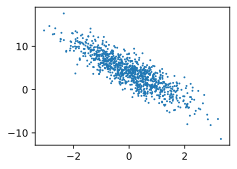

In [52]:
d2l.set_figsize()
d2l.plt.scatter(features[:, 1].detach().numpy(), labels.detach().numpy(), 1);

定义一个`data_iter`函数，
该函数接收批量大小、特征矩阵和标签向量作为输入，生成大小为`batch_size`的小批量

In [53]:
def data_iter(batch_size, features, labels):
    num_examples = len(features)
    indices = list(range(num_examples))
    random.shuffle(indices)
    for i in range(0, num_examples, batch_size):
        batch_indices = torch.tensor(
            indices[i: min(i + batch_size, num_examples)])
        yield features[batch_indices], labels[batch_indices]

batch_size = 10

for X, y in data_iter(batch_size, features, labels):
    print(X, '\n', y)
    break

tensor([[ 0.1972,  0.4252],
        [ 1.0933,  1.8830],
        [ 0.8025, -0.2643],
        [-0.7307,  0.9377],
        [ 1.3744,  0.7217],
        [-0.3308, -0.2594],
        [-0.5861, -0.6261],
        [ 0.0474, -0.1151],
        [-1.4502,  0.5863],
        [-1.6193, -0.1252]]) 
 tensor([[ 3.1571],
        [-0.0343],
        [ 6.6885],
        [-0.4446],
        [ 4.4866],
        [ 4.4064],
        [ 5.1596],
        [ 4.6889],
        [-0.7109],
        [ 1.3986]])


在我们开始用小批量随机梯度下降优化我们的模型参数之前
我们需要先有一些参数

In [54]:
# 均值为0，方差为0.01的2*1的tensor
w = torch.normal(0, 0.01, size=(2,1), requires_grad=True)
b = torch.zeros(1, requires_grad=True)
print(w,b)

tensor([[ 0.0011],
        [-0.0070]], requires_grad=True) tensor([0.], requires_grad=True)


定义模型，将模型的输入和参数同模型的输出关联起来

In [55]:
def linreg(X, w, b):  
    """线性回归模型"""
    return torch.matmul(X, w) + b

定义损失函数

In [56]:
def squared_loss(y_hat, y):  
    """均方损失"""
    return (y_hat - y.reshape(y_hat.shape)) ** 2 / 2

定义优化算法

In [57]:
def sgd(params, lr, batch_size):  
    """小批量随机梯度下降"""
    with torch.no_grad():
        for param in params:
            param -= lr * param.grad / batch_size
            param.grad.zero_()

训练过程

In [58]:
lr = 0.01
num_epochs = 30
net = linreg
loss = squared_loss

for epoch in range(num_epochs):
    i=1
    for X, y in data_iter(batch_size, features, labels):
        print('batch次数',i)
        i+=1
        l = loss(net(X, w, b), y)
        l.sum().backward()
        sgd([w, b], lr, batch_size)
    with torch.no_grad():
        train_l = loss(net(features, w, b), labels)
        print(f'epoch {epoch + 1}, loss {float(train_l.mean()):f}')

batch次数 1
batch次数 2
batch次数 3
batch次数 4
batch次数 5
batch次数 6
batch次数 7
batch次数 8
batch次数 9
batch次数 10
batch次数 11
batch次数 12
batch次数 13
batch次数 14
batch次数 15
batch次数 16
batch次数 17
batch次数 18
batch次数 19
batch次数 20
batch次数 21
batch次数 22
batch次数 23
batch次数 24
batch次数 25
batch次数 26
batch次数 27
batch次数 28
batch次数 29
batch次数 30
batch次数 31
batch次数 32
batch次数 33
batch次数 34
batch次数 35
batch次数 36
batch次数 37
batch次数 38
batch次数 39
batch次数 40
batch次数 41
batch次数 42
batch次数 43
batch次数 44
batch次数 45
batch次数 46
batch次数 47
batch次数 48
batch次数 49
batch次数 50
batch次数 51
batch次数 52
batch次数 53
batch次数 54
batch次数 55
batch次数 56
batch次数 57
batch次数 58
batch次数 59
batch次数 60
batch次数 61
batch次数 62
batch次数 63
batch次数 64
batch次数 65
batch次数 66
batch次数 67
batch次数 68
batch次数 69
batch次数 70
batch次数 71
batch次数 72
batch次数 73
batch次数 74
batch次数 75
batch次数 76
batch次数 77
batch次数 78
batch次数 79
batch次数 80
batch次数 81
batch次数 82
batch次数 83
batch次数 84
batch次数 85
batch次数 86
batch次数 87
batch次数 88
batch次数 89
batch次数 90
batch次数 91
batch次数 

比较真实参数和通过训练学到的参数来评估训练的成功程度

In [59]:
print(f'w的估计误差: {true_w - w.reshape(true_w.shape)}')
print(f'b的估计误差: {true_b - b}')

w的估计误差: tensor([-0.0001,  0.0005], grad_fn=<SubBackward0>)
b的估计误差: tensor([4.6253e-05], grad_fn=<RsubBackward1>)
